In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
df=pd.read_csv(r'C:\Users\escag\es_repo280720\Homework\Unit3\data\bikeshare.csv', parse_dates=['datetime'])

In [2]:
df.head()

datetime  season  holiday  workingday      weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0  Clear Skies  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0  Clear Skies  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0  Clear Skies  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0  Clear Skies  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0  Clear Skies  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 850.6+ KB


In [4]:
#Split datetime into its components
from datetime import date, time, datetime

df['Date']=df['datetime'].dt.date
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month
df['Day']=df['datetime'].dt.day
df['DOW']=df['datetime'].dt.dayofweek
df['Hour']=df['datetime'].dt.hour

In [5]:
#Create a column tracking passing of time
df['time']= (df['datetime']- df['datetime'].min()).dt.days

In [6]:
df.head()

datetime  season  holiday  workingday      weather  temp   atemp  \
0 2011-01-01 00:00:00  Spring        0           0  Clear Skies  9.84  14.395   
1 2011-01-01 01:00:00  Spring        0           0  Clear Skies  9.02  13.635   
2 2011-01-01 02:00:00  Spring        0           0  Clear Skies  9.02  13.635   
3 2011-01-01 03:00:00  Spring        0           0  Clear Skies  9.84  14.395   
4 2011-01-01 04:00:00  Spring        0           0  Clear Skies  9.84  14.395   

   humidity  windspeed  count        Date  Year  Month  Day  DOW  Hour  time  
0        81        0.0     16  2011-01-01  2011      1    1    5     0     0  
1        80        0.0     40  2011-01-01  2011      1    1    5     1     0  
2        80        0.0     32  2011-01-01  2011      1    1    5     2     0  
3        75        0.0     13  2011-01-01  2011      1    1    5     3     0  
4        75        0.0      1  2011-01-01  2011      1    1    5     4     0

## Exploratory Data Analysis

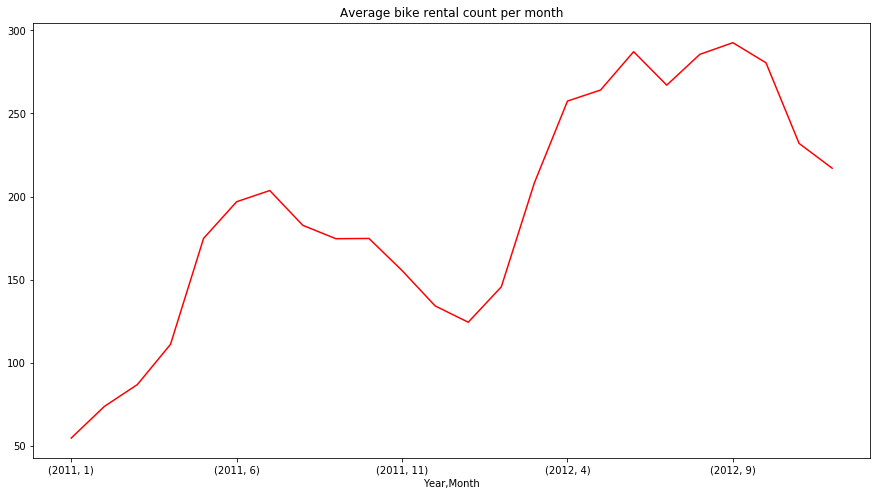

In [7]:
df.groupby(['Year', 'Month'])['count'].mean().plot( color='red', figsize=(15,8), title= 'Average bike rental count per month')

### Rental counts bar charts: Temperature, Humidity, Windspeed and Season

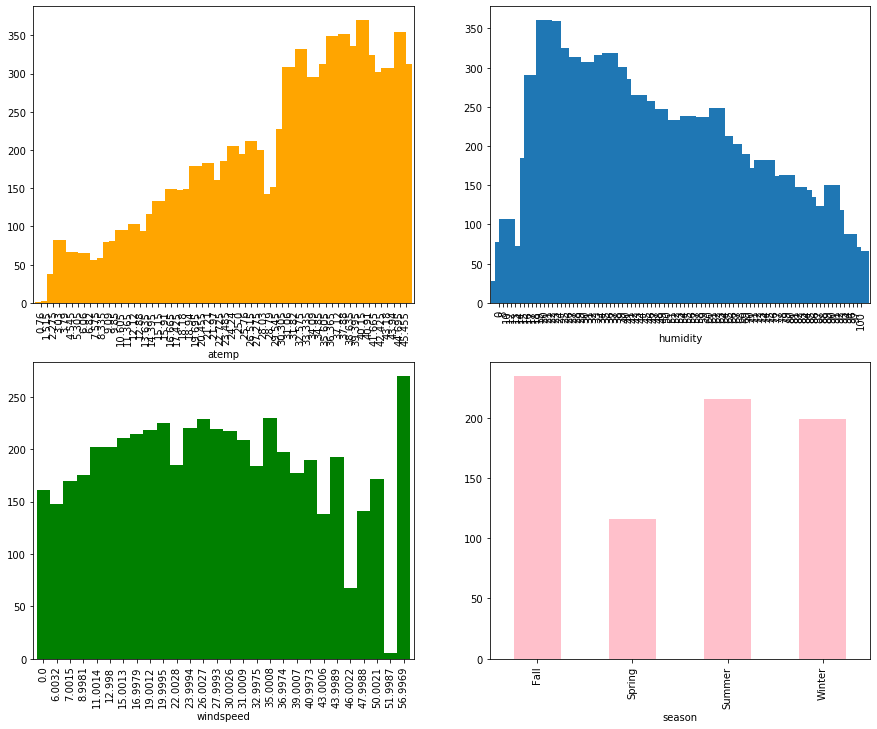

In [8]:
fig,axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)
plt.sca(axes[0][0])
atemp_count= df.groupby(['atemp'])['count'].mean()
atemp_count.plot(kind = 'bar', width=2, color='orange')

plt.sca(axes[0][1])
humidity_count= df.groupby(['humidity'])['count'].mean()
humidity_count.plot(kind = 'bar', width=4)

plt.sca(axes[1][0])
windspeed_count= df.groupby(['windspeed'])['count'].mean()
windspeed_count.plot(kind = 'bar', width=1, color='green')

plt.sca(axes[1][1])
season_count= df.groupby(['season'])['count'].mean()
season_count.plot(kind = 'bar', width=0.5, color='pink')

### Rental count and time-series

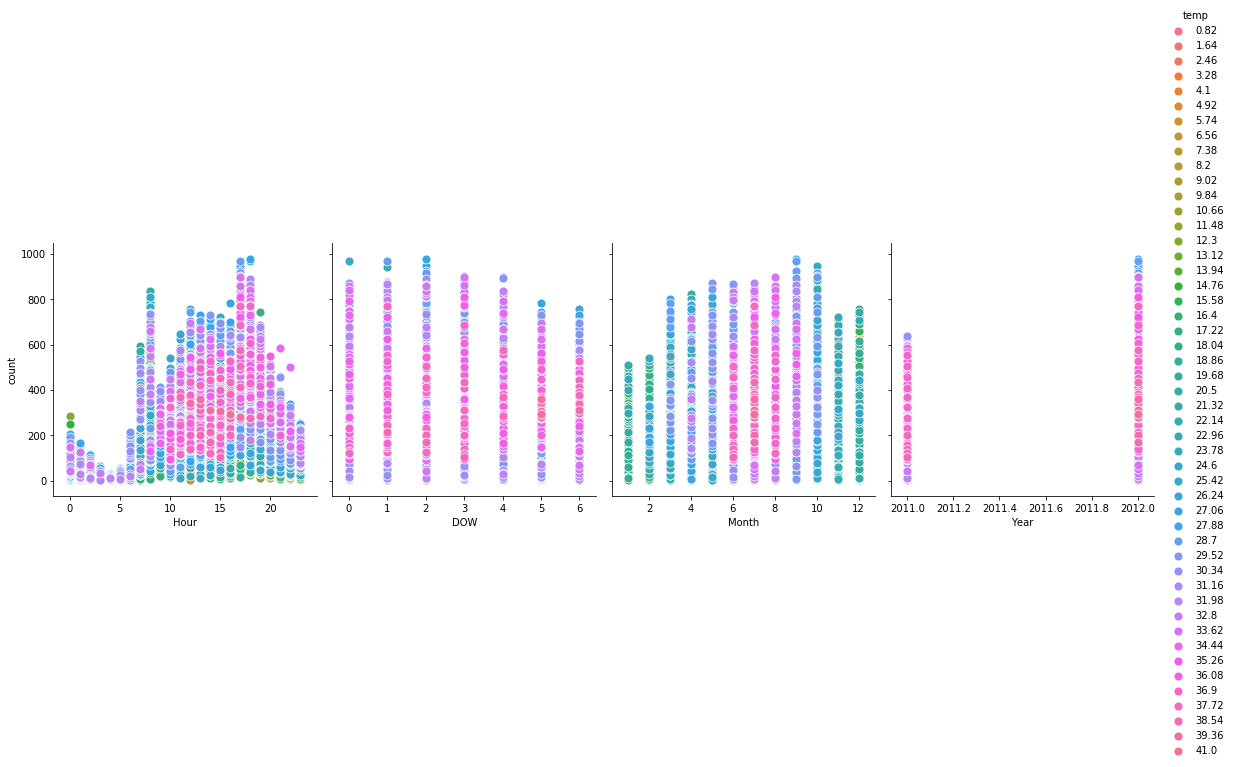

In [9]:
x_vars=[ 'Hour','DOW', 'Month','Year']
y_vars= ['count']
grid=sns.PairGrid(df, y_vars=y_vars, x_vars=x_vars, hue='temp', height=4 )
grid.map(sns.scatterplot, s=80  )
grid.add_legend()

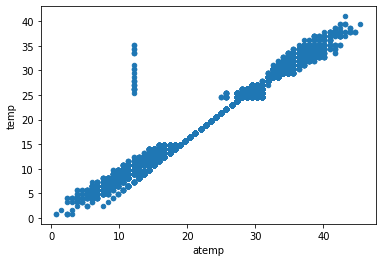

In [10]:
#Relationship between temperature and temperature it feels like outside (atemp)
#There are some anomalous values
df.plot(x='atemp', y='temp', kind='scatter')

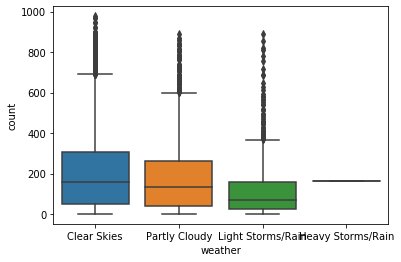

In [12]:
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12))
sns.boxplot(data=df, x='weather', y='count')
##Checking for outliers

### Average rentals/hour in 2011 and 2012

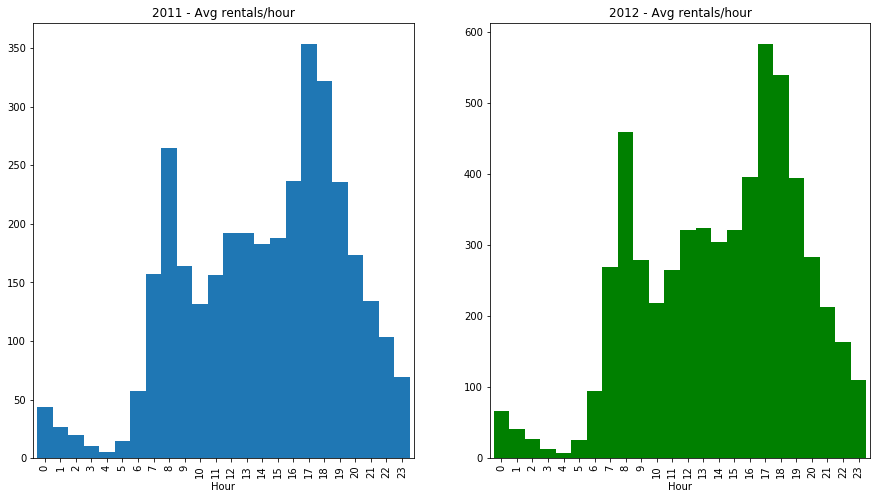

In [13]:
fig,axes = plt.subplots(figsize=(15, 8), nrows=1, ncols=2, )
plt.sca(axes[0])
count2011= df.loc[df.Year==2011, :].groupby(['Hour'])['count'].mean()
count2011.plot(kind = 'bar', width=1, title='2011 - Avg rentals/hour')

plt.sca(axes[1])
count2012= df.loc[df.Year==2012, :].groupby(['Hour'])['count'].mean()
count2012.plot(kind = 'bar', width=1,color='green', title='2012 - Avg rentals/hour')


### Average Rentals per weather conditions and Season

Text(0.5, 0, 'Term')

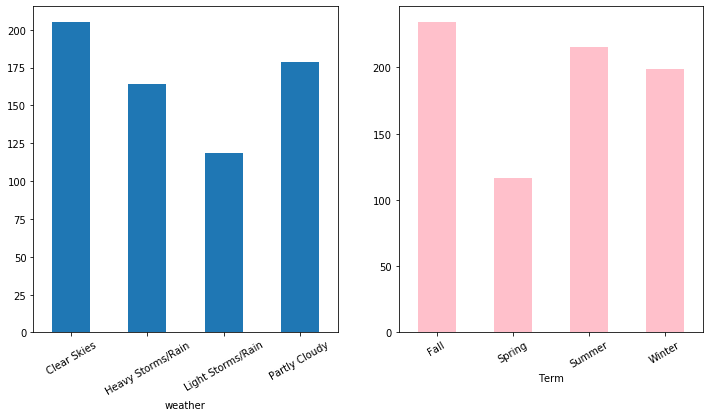

In [14]:
fig,axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
plt.sca(axes[0])
df.groupby(['weather'])['count'].mean().plot( kind='bar', width=0.5, rot=30)
plt.sca(axes[1])
df.groupby(['season'])['count'].mean().plot( kind='bar', width=0.5, color='pink',rot=30)
plt.xlabel('Term')

In [15]:
#Check for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
Date          0
Year          0
Month         0
Day           0
DOW           0
Hour          0
time          0
dtype: int64

In [16]:
df.Day.max() #only Days 1 to 19 are collected each month

19

## Modelling the Data - GBR

In [17]:
gbm=GradientBoostingRegressor()
import category_encoders as ce
ore = ce.OrdinalEncoder()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(ore,gbm)

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('count', axis=1)
X.drop(['datetime', 'Date'], axis=1, inplace=True) #Date, once encoded, is similar to 'Time'
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [19]:
pipe.steps[1][1].set_params(max_depth=3, n_estimators=100,learning_rate=0.1 ) # starting parameters

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8134837095789759

In [21]:
#Score looks good
#look at feature importances
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [22]:
feats # Can remove Year Column

Colums  Importance
12        Hour    0.655333
13        time    0.112901
2   workingday    0.083525
5        atemp    0.077892
4         temp    0.026410
6     humidity    0.019070
3      weather    0.015140
11         DOW    0.006488
9        Month    0.001548
7    windspeed    0.000750
10         Day    0.000449
0       season    0.000261
1      holiday    0.000233
8         Year    0.000000

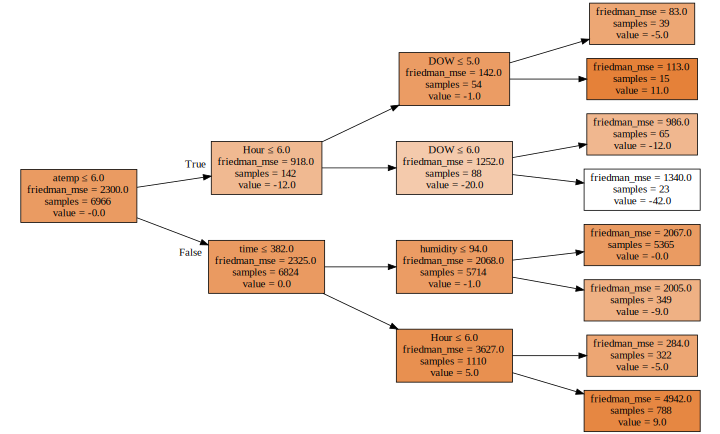

In [23]:
#Graphically checking a few trees
from prep import draw_tree
draw_tree(pipe.steps[1][1].estimators_[-2,0],X_train)


## Feature Engineering

### Try to improve accuracy by adding features to raw data 

In [24]:
#Add a column representing light/dark - different time intervals for each season
conditions = [
    (df['season'] =='Spring') & (df.Hour >8) & (df.Hour <17),
    (df['season'] == 'Summer') & (df.Hour >7) & (df.Hour <19),
    (df['season'] =='Fall') & (df.Hour >6) & (df.Hour <21),
    (df['season'] == 'Winter') & (df.Hour >7) & (df.Hour <18)]
results = [1,1,1,1]
df['Daylight'] = np.select(conditions, results, 0)

In [25]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [26]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) # score improved. Keep Daylight

0.8247761971258762

In [27]:
#Try if temperature and humidity combined improves the score
df['temp_humidity']=df.atemp*df.humidity

In [28]:
X = df.drop(['count',  'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [29]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.8042711207434196

In [30]:
# score didnt improve. Remove temp_humidity
df.drop('temp_humidity', axis=1, inplace=True)

In [31]:
#Try weather and humidity
di={'Clear Skies':1, 'Partly Cloudy': 2, 'Light Storms/Rain':3,
       'Heavy Storms/Rain':4}
df['weather_humidity']=df['weather'].map(di)*df['humidity']

In [32]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.7700024641455256

In [33]:
# score didnt improve. Remove temp_humidity
df.drop('weather_humidity', axis=1, inplace=True)

In [34]:
#temperature and windspeed combined
df['weatherattr']=df.atemp*(1/(df.windspeed+0.1))

In [35]:
X = df.drop(['count', 'Year', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.7958624751385521

In [36]:
# score didnt improve. Remove temp_humidity
df.drop('weatherattr', axis=1, inplace=True)

In [37]:
X = df.drop(['count', 'Year', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.8246753287365454

In [38]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8105180741845699

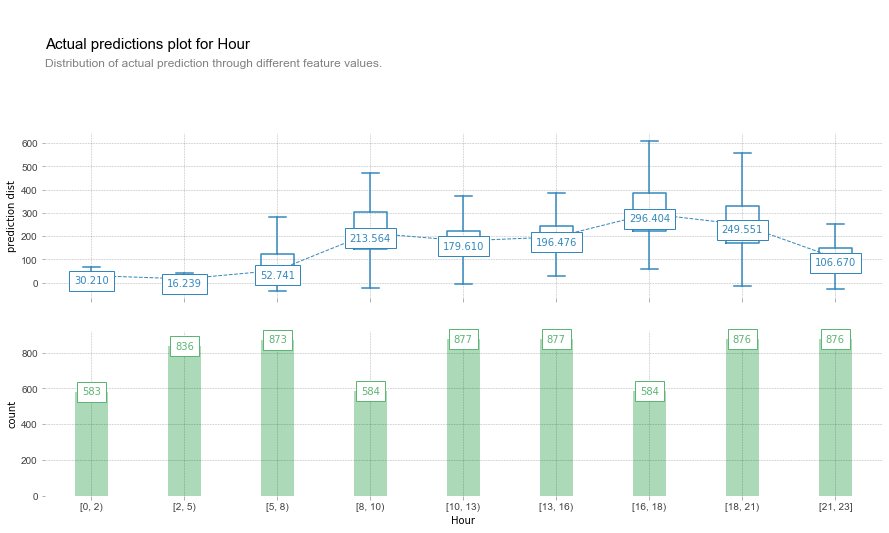

In [39]:
# impact of Hour 
from pdpbox import pdp, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=pipe, X=X_train, 
    feature='Hour', feature_name='Hour', predict_kwds={}
)

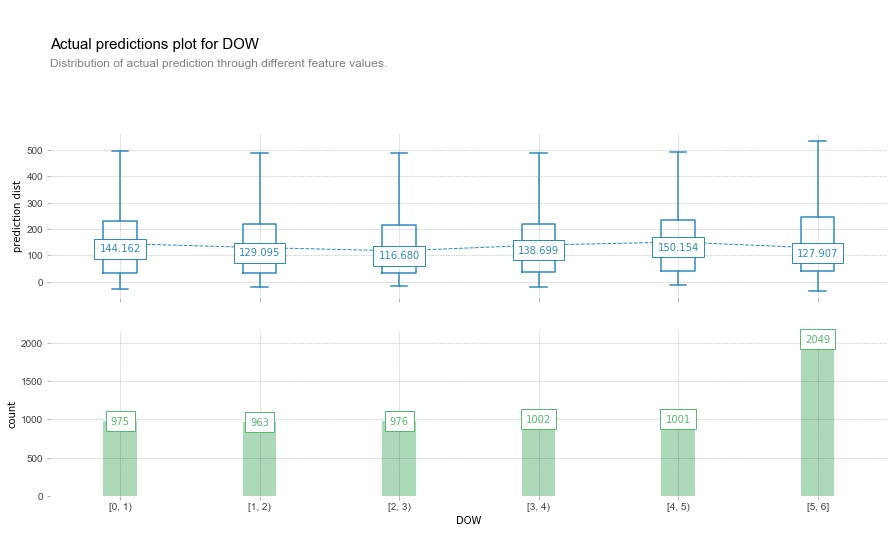

In [40]:
#impact of "DOW"(Day of teh week)
from pdpbox import pdp, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=pipe, X=X_train, 
    feature='DOW', feature_name='DOW', predict_kwds={}
)

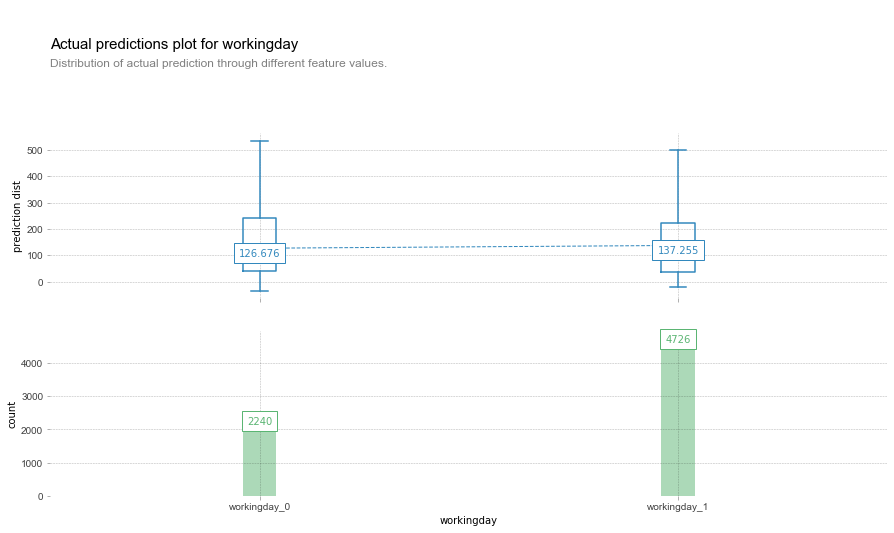

In [41]:
# impact of "workingday" 
from pdpbox import pdp, info_plots
fig, axes, summary_df = info_plots.actual_plot(
    model=pipe, X=X_train, 
    feature='workingday', feature_name='workingday', predict_kwds={}
)

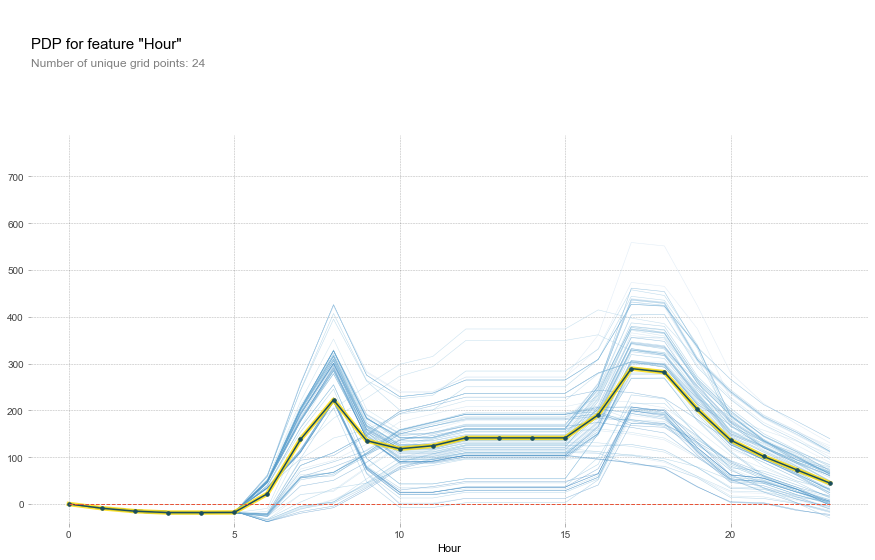

In [42]:
# additive  and marginal impact of "Hour"
pdp_overall_qual = pdp.pdp_isolate(
    model=pipe, dataset=X_train, model_features=X_train.columns.tolist(), 
    feature='Hour', cust_grid_points=X['Hour'].unique().tolist()
)
fig, axes = pdp.pdp_plot(pdp_overall_qual, 'Hour', plot_lines=True, frac_to_plot=100)

### Time Shift

In [43]:
df=df.reset_index()
df=df.set_index('datetime')

In [44]:
#shift count by one hour, one day, one week
df['count1H']= df['count'].shift(1)
df_1D=df.shift(1, freq='D')
df_1D.rename(columns={'count': 'count1D'},  inplace=True)
df_1W=df.shift(7, freq='D')
df_1W.rename(columns={'count': 'count1W'},  inplace=True)

In [45]:
df=df.merge(df_1D['count1D'], on='datetime',how='left' )
df=df.merge(df_1W['count1W'], on='datetime',how='left' )

In [46]:
df['count1Hpct']=(1-df['count1H']/df['count'])
df['count1Dpct']=(1-df['count1D']/df['count'])
df['count1Wpct']=(1-df['count1W']/df['count'])

In [47]:
missing_cols_query = df.isnull().sum() > 0
missing_cols_num = df.loc[:, missing_cols_query].select_dtypes(include=np.number).columns.tolist()

df[missing_cols_num] = df[missing_cols_num].fillna(0)


In [48]:
df=df.reset_index()

In [67]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9856838629685397

#### Score improved by 19% 

In [68]:
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [69]:
feats # could remove all columns with Importance=0

Colums  Importance
16     count1H    0.699713
19  count1Hpct    0.174989
17     count1D    0.083399
20  count1Dpct    0.024256
13        Hour    0.007724
18     count1W    0.004954
14        time    0.002179
21  count1Wpct    0.001459
0        index    0.000480
11         Day    0.000421
12         DOW    0.000183
15    Daylight    0.000060
3   workingday    0.000056
7     humidity    0.000030
6        atemp    0.000028
8    windspeed    0.000026
5         temp    0.000021
10       Month    0.000014
4      weather    0.000005
1       season    0.000002
2      holiday    0.000001
9         Year    0.000000

In [70]:
X = df.drop(['count', 'Year', 'datetime', 'Date','holiday'], axis=1)
y = df['count']

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv=TimeSeriesSplit(n_splits=5)

In [55]:
max_depth = [3,4,5]
learning_rate=[.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv)
            cv_scores.append((scores.mean(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [56]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.6308863284002237, 3, 0.01, 100),
 (0.6947623215883858, 4, 0.01, 100),
 (0.7268340389336343, 5, 0.01, 100),
 (0.9260741628615646, 3, 0.01, 500),
 (0.9427705791710611, 3, 0.1, 100),
 (0.9428902549197644, 3, 0.01, 1000),
 (0.9434281192611443, 4, 0.01, 500),
 (0.9447490589519802, 5, 0.01, 500),
 (0.9460956087998849, 5, 0.1, 100),
 (0.9478479481936395, 5, 0.1, 1000),
 (0.9479470639633678, 5, 0.1, 500),
 (0.948338641868838, 5, 0.01, 1000),
 (0.9497898734501835, 4, 0.01, 1000),
 (0.9500500060447561, 4, 0.1, 100),
 (0.9501620996035826, 4, 0.1, 1000),
 (0.9503525271729213, 4, 0.1, 500),
 (0.9522087423679091, 3, 0.1, 500),
 (0.9528961213952009, 3, 0.1, 1000)]

In [72]:
pipe.steps[1][1].set_params(max_depth=3, n_estimators=1000, learning_rate=0.1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9859777373395121

In [74]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [75]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9964188271095229

In [78]:
X_pred=pipe.predict(X_test,)
X_pred=X_pred.clip(min=0) #clip negative values
X_pred.max()

941.2912642366115

 **Root Mean Squared Log Error**

In [79]:
from sklearn.metrics import mean_squared_log_error


In [80]:
np.sqrt(mean_squared_log_error( y_test, X_pred ))

0.1521512177811508

## Use log(count) to get more stable and non-negative predicted values

In [81]:
X = df.drop('count', axis=1)
X.drop(['Year','datetime', 'Date'], axis=1, inplace=True)
y = np.log1p(df['count'])
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [82]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.998610978588537

In [65]:
max_depth = [3,4,5]
learning_rate=[.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv)
            cv_scores.append((scores.mean(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [66]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.7345440351785976, 3, 0.01, 100),
 (0.7812650100280802, 4, 0.01, 100),
 (0.8028034145417944, 5, 0.01, 100),
 (0.9798257786572517, 3, 0.01, 500),
 (0.9886631479657506, 4, 0.01, 500),
 (0.9891918334656757, 3, 0.1, 100),
 (0.9893529376011252, 3, 0.01, 1000),
 (0.9912785006025071, 4, 0.1, 100),
 (0.9914507844669899, 4, 0.01, 1000),
 (0.9915883885555632, 4, 0.1, 1000),
 (0.9915961965426263, 4, 0.1, 500),
 (0.9917265777599624, 5, 0.01, 500),
 (0.9924098714773795, 5, 0.1, 100),
 (0.9928806017664021, 5, 0.01, 1000),
 (0.9929537609049717, 5, 0.1, 500),
 (0.9930536615177609, 5, 0.1, 1000),
 (0.9941770363769695, 3, 0.1, 500),
 (0.9946203090118455, 3, 0.1, 1000)]

In [83]:
pipe.steps[1][1].set_params(max_depth=3, n_estimators=1000,learning_rate=0.1 )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [85]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9989119602627364

In [86]:
X_predlog=pipe.predict(X_test,)

In [87]:
X_predlog

array([2.96606582, 3.30447469, 4.21269378, ..., 5.13339879, 4.86965227,
       4.48170237])

In [92]:
X_pred=np.expm1(X_predlog)
y_testexp=np.expm1(y_test)

In [93]:
np.sqrt(mean_squared_log_error( y_testexp, X_pred ))

0.044814818446660104

In [85]:
X_test_pred=X_test.copy()
X_test_pred['Prediction']=pipe.predict(X_test)

X_test_pred = X_test_pred.merge(y_test, left_index=True, right_index=True)

X_test_pred['RPrediction']=np.expm1(X_test_pred['Prediction'])
X_test_pred['Rcount']=np.expm1(X_test_pred['count'])

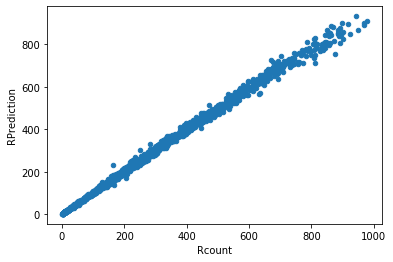

In [86]:
X_test_pred.plot(x='Rcount', y='RPrediction', kind='scatter')

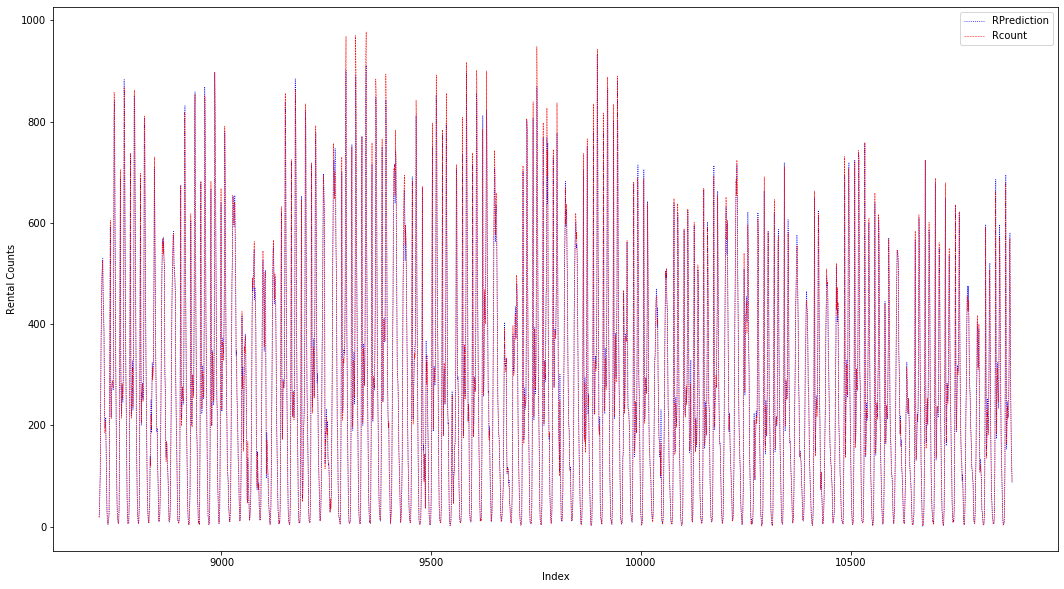

In [105]:
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'RPrediction', data=X_test_pred, linewidth=0.8, color='b', linestyle=':')
ax.plot('index', 'Rcount', data=X_test_pred , linewidth=0.5, color='r', ls='--')
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [106]:
X_test_pred['error']=X_test_pred['Rcount']-X_test_pred['RPrediction']
X_test_pred['error_pc']=X_test_pred['error']/X_test_pred['Rcount']
print(X_test_pred['error_pc'].min(), " ", X_test_pred['error_pc'].max(),X_test_pred['error_pc'].mean() )

-0.3977651523074065   0.2315752174881305 -0.0027829391522634023


## XGBoost 

In [94]:
import xgboost as xgb
from category_encoders import OrdinalEncoder
from utils import extract_dates, get_val_scores

In [95]:
mod1=xgb.XGBRegressor()
mod1.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [96]:
pipe2=make_pipeline(OrdinalEncoder(), mod1)

In [97]:
pipe2.steps[1][1].get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)>

In [98]:
X=df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']

In [99]:
scores = get_val_scores(pipe2, X, y, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=True)

In [100]:
scores

{'validation_score': 0.9498409921925222,
 'fold_scores': array([0.8107542 , 0.98721502, 0.99419006, 0.97093624, 0.98610944]),
 'test_score': 0.9934634714358493}

In [101]:
pipe2.steps[1][1].set_params(learning_rate=0.1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
scores = get_val_scores(pipe2, X, y, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=True)

In [103]:
scores

{'validation_score': 0.9550813704840653,
 'fold_scores': array([0.82650877, 0.99205468, 0.99648213, 0.97377473, 0.98658654]),
 'test_score': 0.9946662513930402}

In [104]:
X=df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_trn, X_tst, y_trn, y_tst=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)

In [105]:
scores = get_val_scores(pipe2, X_trn, y_trn, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=True)

In [106]:
scores

{'validation_score': 0.9411052608835864,
 'fold_scores': array([0.74966334, 0.98740226, 0.99455036, 0.99653098, 0.97737937]),
 'test_score': 0.9871282382091906}

In [107]:
feats=pd.DataFrame({'Importance': pipe2.steps[1][1].feature_importances_, 'Column': X.columns}).sort_values(by='Importance', ascending=False)

In [108]:
feats

Importance      Column
16    0.684141     count1H
19    0.165854  count1Hpct
13    0.076174        Hour
17    0.028252     count1D
18    0.010309     count1W
20    0.010121  count1Dpct
21    0.007081  count1Wpct
12    0.006842         DOW
3     0.004874  workingday
0     0.004627       index
10    0.000405       Month
7     0.000251    humidity
5     0.000244        temp
11    0.000237         Day
4     0.000120     weather
6     0.000104       atemp
2     0.000099     holiday
15    0.000098    Daylight
8     0.000094   windspeed
1     0.000073      season
9     0.000000        Year
14    0.000000        time

In [88]:
max_depth = [3,5,7]
learning_rate=[.01, .1, .3]
num_trees =[500, 1000]
scores_list=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe2.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores = get_val_scores(pipe2, X_trn, y_trn, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=False)
            scores_list.append((scores['test_score'], depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 3, rate: 0.3, trees: 500
testing model with: depth: 3, rate: 0.3, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.3, trees: 500
testing model with: depth: 5, rate: 0.3, trees: 1000
testing model with: depth: 7, rate: 0.01, trees: 500
testing model with: depth: 7, rate: 0.01, trees: 1000
testing model with: depth: 7, rate: 0.1, trees: 500
testing model with: depth: 7, rate: 0.1, trees: 1000
testing model with: depth: 7, rate: 0.3, trees: 500
testing model with: depth: 7, rate: 0.3, trees: 1000


In [89]:
scores_list.sort(key=lambda x: x[0])
scores_list

[(0.9557191331049565, 3, 0.01, 500),
 (0.9673738446896564, 5, 0.3, 500),
 (0.967423551914578, 5, 0.3, 1000),
 (0.9770369617851424, 3, 0.01, 1000),
 (0.984172676805087, 7, 0.3, 500),
 (0.9841736659620351, 7, 0.3, 1000),
 (0.9842039475636826, 5, 0.01, 500),
 (0.9845657296945646, 7, 0.01, 500),
 (0.9852125588462912, 3, 0.1, 1000),
 (0.9853855559916198, 3, 0.1, 500),
 (0.9861060471374594, 3, 0.3, 500),
 (0.9862928274906451, 3, 0.3, 1000),
 (0.9871285458018918, 5, 0.01, 1000),
 (0.9877938993422911, 7, 0.01, 1000),
 (0.9883429859716449, 5, 0.1, 500),
 (0.9885557315797395, 5, 0.1, 1000),
 (0.9887608659466377, 7, 0.1, 500),
 (0.9887856267020787, 7, 0.1, 1000)]

In [109]:
pipe2.steps[1][1].set_params(max_depth=7, n_estimators=1000,learning_rate=0.1 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
X_pred=X_tst.copy()
X_pred['Prediction']=pipe2.predict(X_tst)

X_pred = X_pred.merge(y_tst, left_index=True, right_index=True)

X_pred['Prediction']=(X_pred['Prediction'])
X_pred['count']=(X_pred['count'])

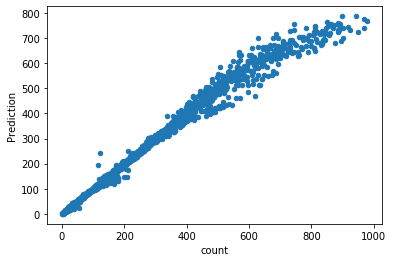

In [111]:
X_pred.plot(x='count', y='Prediction', kind='scatter')

In [112]:
X_pred['error']=X_pred['count']-X_pred['Prediction']
X_pred['error_pc']=X_pred['error']/X_pred['count']
print(X_pred['error_pc'].min(), " ",X_pred['error_pc'].max())

-1.0864441394805908   1.7164489030838013


In [113]:
scores = get_val_scores(pipe2, X, y, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=False)

In [114]:
scores

{'validation_score': 0.9520540905787621, 'test_score': 0.9937965161027777}

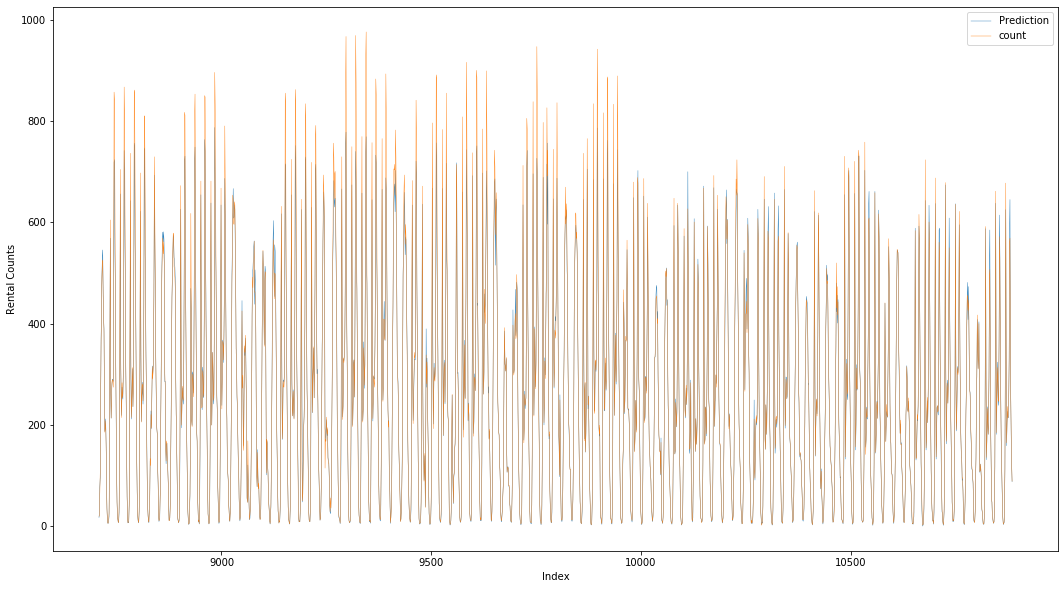

In [115]:
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'Prediction', data=X_pred, linewidth=0.4)
ax.plot('index', 'count', data=X_pred , linewidth=0.4)
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [117]:
X_pred=pipe2.predict(X_tst)


In [118]:
X_pred.min()

-0.5919323

In [119]:
X_pred=X_pred.clip(min=0) #clip negative values
X_pred.max()

861.7649

In [120]:
np.sqrt(mean_squared_log_error( y_tst, X_pred ))

0.06478385547485542

In [ ]:
References:
    https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
        